In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [2]:
pd.read_csv?

In [3]:
CCTV_Seoul = pd.read_csv(
      './data/01. CCTV_in_Seoul.csv' # 읽어들일 파일의 경로
    , encoding='utf-8'
)
CCTV_Seoul.head(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


In [4]:
# DataFrame에서 컬럼 확인 => 데이터 구조 확인
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [5]:
# 특정 컬럼의 이름 변경 => rename function
# CCTV_Seoul.columns[0] : '기관명' 컬럼
CCTV_Seoul.rename(
      columns={CCTV_Seoul.columns[0]:'구별'}
    , inplace=True 
)
CCTV_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


---
### 인구현황(서울시) 파일 읽기 
---

In [6]:
pd.read_excel?

In [7]:
pop_Seoul = pd.read_csv(
      './data/01. population_in_Seoul.csv'
    , encoding='cp949'
)
pop_Seoul.head(3)

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,"4,202,888","10,197,604","5,000,005","5,197,599","9,926,968","4,871,560","5,055,408","270,636","128,445","142,191",2.36,"1,321,458"


In [8]:
pop_Seoul = pd.read_csv(
      './data/01. population_in_Seoul.csv'
    , encoding='cp949'
    , header=2
)
pop_Seoul.head(3)

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2017.1/4,합계,"4,202,888","10,197,604","5,000,005","5,197,599","9,926,968","4,871,560","5,055,408","270,636","128,445","142,191",2.36,"1,321,458"
1,2017.1/4,종로구,"72,654","162,820","79,675","83,145","153,589","75,611","77,978","9,231","4,064","5,167",2.11,"25,425"
2,2017.1/4,중구,"59,481","133,240","65,790","67,450","124,312","61,656","62,656","8,928","4,134","4,794",2.09,"20,764"


In [9]:
!pip install xlrd

In [10]:
# xlrd 모듈 설치 => 프롬프트에서 ml01-02 활성화 -> conda install xlrd 
pop_Seoul = pd.read_excel(
      './data/01. population_in_Seoul.xls'
    , header=2
    , usecols='B,D,G,J,N' # 변경된 부분
)
pop_Seoul.head(3)

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0


In [11]:
# 컬럼명을 변경
# 자치구	계	    계.1	     계.2	65세이상고령자
# 구별     인구수   한국인    외국인   고령자
pop_Seoul.rename(
    columns={
          pop_Seoul.columns[0] : '구별'
        , pop_Seoul.columns[1] : '인구수'
        , pop_Seoul.columns[2] : '한국인'
        , pop_Seoul.columns[3] : '외국인'
        , pop_Seoul.columns[4] : '고령자'
    }
    , inplace=True
)
pop_Seoul.head(3)

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0


In [12]:
dates = pd.date_range('20200902', periods=6)
dates

DatetimeIndex(['2020-09-02', '2020-09-03', '2020-09-04', '2020-09-05',
               '2020-09-06', '2020-09-07'],
              dtype='datetime64[ns]', freq='D')

In [13]:
df = pd.DataFrame(
    np.arange(24).reshape(6,4)
    , index=dates 
    , columns=['A','B','C','D']
)
df

,A,B,C,D
2020-09-02,0,1,2,3
2020-09-03,4,5,6,7
2020-09-04,8,9,10,11
2020-09-05,12,13,14,15
2020-09-06,16,17,18,19
2020-09-07,20,21,22,23


In [14]:
df.index

DatetimeIndex(['2020-09-02', '2020-09-03', '2020-09-04', '2020-09-05',
               '2020-09-06', '2020-09-07'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [17]:
# sort
df.sort_values(by='B', ascending=False)

,A,B,C,D
2020-09-07,20,21,22,23
2020-09-06,16,17,18,19
2020-09-05,12,13,14,15
2020-09-04,8,9,10,11
2020-09-03,4,5,6,7
2020-09-02,0,1,2,3


In [18]:
# 인덱싱 
df['A']

2020-09-02     0
2020-09-03     4
2020-09-04     8
2020-09-05    12
2020-09-06    16
2020-09-07    20
Freq: D, Name: A, dtype: int32

In [19]:
# 슬라이싱
df[0:3]

,A,B,C,D
2020-09-02,0,1,2,3
2020-09-03,4,5,6,7
2020-09-04,8,9,10,11


In [20]:
df['2020-09-03':'2020-09-05']

,A,B,C,D
2020-09-03,4,5,6,7
2020-09-04,8,9,10,11
2020-09-05,12,13,14,15


In [21]:
# df.iloc['2020-09-03'] => 숫자인덱싱 => Error
# dates[0] == '2020-09-02'
df.loc[dates[0]]

A    0
B    1
C    2
D    3
Name: 2020-09-02 00:00:00, dtype: int32

In [22]:
# df.loc[행,열] 
df.loc[:, ['A','C']]

,A,C
2020-09-02,0,2
2020-09-03,4,6
2020-09-04,8,10
2020-09-05,12,14
2020-09-06,16,18
2020-09-07,20,22


In [23]:
df.loc['20200902':'20200903', ['A','C']]

,A,C
2020-09-02,0,2
2020-09-03,4,6


In [24]:
df.loc['20200903', ['A','C']]

A    4
C    6
Name: 2020-09-03 00:00:00, dtype: int32

In [25]:
df.loc['20200903', 'A']

4

In [26]:
df

,A,B,C,D
2020-09-02,0,1,2,3
2020-09-03,4,5,6,7
2020-09-04,8,9,10,11
2020-09-05,12,13,14,15
2020-09-06,16,17,18,19
2020-09-07,20,21,22,23


In [27]:
df.iloc[3]

A    12
B    13
C    14
D    15
Name: 2020-09-05 00:00:00, dtype: int32

In [28]:
df

,A,B,C,D
2020-09-02,0,1,2,3
2020-09-03,4,5,6,7
2020-09-04,8,9,10,11
2020-09-05,12,13,14,15
2020-09-06,16,17,18,19
2020-09-07,20,21,22,23


In [29]:
# df.iloc[행,열]
df.iloc[3:5,0:2]

,A,B
2020-09-05,12,13
2020-09-06,16,17


In [30]:
df

,A,B,C,D
2020-09-02,0,1,2,3
2020-09-03,4,5,6,7
2020-09-04,8,9,10,11
2020-09-05,12,13,14,15
2020-09-06,16,17,18,19
2020-09-07,20,21,22,23


In [31]:
# df.iloc[행팬시[],열팬시[]]
df.iloc[[1,3],[0,2]]

,A,C
2020-09-03,4,6
2020-09-05,12,14


In [32]:
# df.iloc[1:3, start:end]
df.iloc[1:3, :]

,A,B,C,D
2020-09-03,4,5,6,7
2020-09-04,8,9,10,11


In [33]:
df.iloc[:,1:3]

,B,C
2020-09-02,1,2
2020-09-03,5,6
2020-09-04,9,10
2020-09-05,13,14
2020-09-06,17,18
2020-09-07,21,22


In [34]:
df

,A,B,C,D
2020-09-02,0,1,2,3
2020-09-03,4,5,6,7
2020-09-04,8,9,10,11
2020-09-05,12,13,14,15
2020-09-06,16,17,18,19
2020-09-07,20,21,22,23


In [35]:
# 블리언 색인
df[df.A > 8]

,A,B,C,D
2020-09-05,12,13,14,15
2020-09-06,16,17,18,19
2020-09-07,20,21,22,23


In [36]:
df.A # == df['A']

2020-09-02     0
2020-09-03     4
2020-09-04     8
2020-09-05    12
2020-09-06    16
2020-09-07    20
Freq: D, Name: A, dtype: int32

In [37]:
# DataFrame copy X , 같은 주소를 참조 변수
df1 = df
id(df1) == id(df)

True

In [38]:
df2 = df.copy()
id(df2) == id(df)

False

In [39]:
df2

,A,B,C,D
2020-09-02,0,1,2,3
2020-09-03,4,5,6,7
2020-09-04,8,9,10,11
2020-09-05,12,13,14,15
2020-09-06,16,17,18,19
2020-09-07,20,21,22,23


In [40]:
# 값이 대입되지 않으면 변수가 생성 X
# df2['E'] Error
df2['E'] = ['one','one','two','three','four','three']

In [41]:
df2

,A,B,C,D,E
2020-09-02,0,1,2,3,one
2020-09-03,4,5,6,7,one
2020-09-04,8,9,10,11,two
2020-09-05,12,13,14,15,three
2020-09-06,16,17,18,19,four
2020-09-07,20,21,22,23,three


In [42]:
# df2[(df2['E']=='two') | <- or (df2['E']=='four')]
df2[(df2['E']=='two') | (df2['E']=='four')]

,A,B,C,D,E
2020-09-04,8,9,10,11,two
2020-09-06,16,17,18,19,four


In [43]:
df2['E'].isin(['two','four']) # == (df2['E']=='two') | (df2['E']=='four')

2020-09-02    False
2020-09-03    False
2020-09-04     True
2020-09-05    False
2020-09-06     True
2020-09-07    False
Freq: D, Name: E, dtype: bool

In [44]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2020-09-04,8,9,10,11,two
2020-09-06,16,17,18,19,four


In [45]:
df

,A,B,C,D
2020-09-02,0,1,2,3
2020-09-03,4,5,6,7
2020-09-04,8,9,10,11
2020-09-05,12,13,14,15
2020-09-06,16,17,18,19
2020-09-07,20,21,22,23


In [46]:
df.apply(np.cumsum) # np.cumsum() : 누적합 구하는 함수

,A,B,C,D
2020-09-02,0,1,2,3
2020-09-03,4,6,8,10
2020-09-04,12,15,18,21
2020-09-05,24,28,32,36
2020-09-06,40,45,50,55
2020-09-07,60,66,72,78


In [47]:
df

,A,B,C,D
2020-09-02,0,1,2,3
2020-09-03,4,5,6,7
2020-09-04,8,9,10,11
2020-09-05,12,13,14,15
2020-09-06,16,17,18,19
2020-09-07,20,21,22,23


In [48]:
df.apply(lambda x:x.max()-x.min())

A    20
B    20
C    20
D    20
dtype: int64

### CCTV와 인구현황 데이터 파악
#### CCTV현황 파악

In [49]:
CCTV_Seoul.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932


In [50]:
# CCTV 개수가 적은 구 -> 정렬 : 오름차순
CCTV_Seoul.sort_values(by='소계').head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [51]:
# CCTV 개수가 많은 구 -> 정렬 : 오름차순
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [52]:
CCTV_Seoul.columns

Index(['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [53]:
# 최근 증가율 계산 
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2014년'] + \
                           CCTV_Seoul['2015년'] + \
                           CCTV_Seoul['2016년']) / \
                           CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.head(3)                            

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252


In [54]:
CCTV_Seoul.sort_values(by='최근증가율', ascending=False) # 내림차순

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765
19,영등포구,904,495,214,195,373,157.979798
0,강남구,2780,1292,430,584,932,150.619195
4,관악구,1496,846,260,390,613,149.290780
23,중구,671,413,190,72,348,147.699758
11,동작구,1091,544,341,103,314,139.338235


#### 인구현황 파악

In [55]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [56]:
pop_Seoul.drop([0], inplace=True)

In [57]:
pop_Seoul.head(3)

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0


In [58]:
# 주의 : 데이터를 믿지 마세요
# 구별 데이터 확인
# 인구현황 => 엑셀 파일 => csv 파일 변경 사용하세요
pop_Seoul['구별'].unique() # 이상 데이터 확인

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [59]:
# nan 들어있는 인덱스를 확인
# 블리언 색인
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [60]:
# 26번 인덱스 삭제
pop_Seoul.drop([26], inplace=True)
# nan 들어있는 인덱스를 확인
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자


In [61]:
# 위 코드를 한줄에 작성
# 작성하세요

In [62]:
# 나중에 인구현황은 범죄현황 연결, 범죄현황은 CCTV현황 연결
# 범죄현황 기준 => 구별 외국인비율, 고령자비율 계산 해서 범죄현황 비교
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head(3)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [63]:
# 서울시에 인구가 많은 구 확인
pop_Seoul.sort_values(by='인구수', ascending=False).head(4)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883


In [64]:
# 외국인이 많은 동네
pop_Seoul.sort_values(by='외국인', ascending=False).head(6)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [65]:
# 외국인 비율 많은 동네
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [66]:
# 고령자 많은 동네
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


### DataFrame 병합

In [67]:
df1 = DataFrame({
      'A' : ['A0','A1','A2','A3']
    , 'B' : ['B0','B1','B2','B3']
    , 'C' : ['C0','C1','C2','C3']
    , 'D' : ['D0','D1','D2','D3']
}
    , index=[0,1,2,3]
)
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [68]:
df2 = DataFrame({
      'A' : ['A4','A5','A6','A7']
    , 'B' : ['B4','B5','B6','B7']
    , 'C' : ['C4','C5','C6','C7']
    , 'D' : ['D4','D5','D6','D7']
}
    , index=[4,5,6,7]
)
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [69]:
df3 = DataFrame({
      'A' : ['A8','A9','A10','A11']
    , 'B' : ['B8','B9','B10','B11']
    , 'C' : ['C8','C9','C10','C11']
    , 'D' : ['D8','D9','D10','D11']
}
    , index=[8,9,10,11]
)
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [70]:
# concat : 이어 붙이기
# axis=0 : default
result = pd.concat([df1,df2,df3], axis=0)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [71]:
# concat : 이어 붙이기
# axis=0 : default
result = pd.concat([df1,df2,df3], axis=0, keys=['df1','df2','df3'])
result

A    B    C    D
df1 0    A0   B0   C0   D0
    1    A1   B1   C1   D1
    2    A2   B2   C2   D2
    3    A3   B3   C3   D3
df2 4    A4   B4   C4   D4
    5    A5   B5   C5   D5
    6    A6   B6   C6   D6
    7    A7   B7   C7   D7
df3 8    A8   B8   C8   D8
    9    A9   B9   C9   D9
    10  A10  B10  C10  D10
    11  A11  B11  C11  D11

In [72]:
result.index

MultiIndex([('df1',  0),
            ('df1',  1),
            ('df1',  2),
            ('df1',  3),
            ('df2',  4),
            ('df2',  5),
            ('df2',  6),
            ('df2',  7),
            ('df3',  8),
            ('df3',  9),
            ('df3', 10),
            ('df3', 11)],
           )

In [73]:
df4 = DataFrame({
      'B' : ['B2','B3','B6','B7']
    , 'D' : ['D2','D3','D6','D7']
    , 'F' : ['F2','F3','F6','F7']
}
, index=[2,3,6,7]
)
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [74]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [75]:
result = pd.concat([df1,df4], axis=1)

In [76]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [77]:
# join='inner'
result = pd.concat([df1,df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [78]:
df1.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [79]:
#  join_axes=[df1.index] -> Error
# result = pd.concat([df1,df4], axis=1, join_axes=[df1.index])
# result

In [80]:
result = pd.concat([df1,df4])
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [81]:
result = pd.concat([df1,df4], ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


### 합치기 - merge
- 합치기 => 조인 => 조인조건 => key

In [82]:
left = pd.DataFrame({
      'key' : ['K0','K4','K2','K3']
    , 'A' : ['A0','A1','A2','A3']
    , 'B' : ['B0','B1','B2','B3']
})
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [83]:
right = pd.DataFrame({
      'key' : ['K0','K1','K2','K3']
    , 'C' : ['C0','C1','C2','C3']
    , 'D' : ['D0','D1','D2','D3']
})
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [84]:
# left : key, right : key <= on='key' default
# how parameter : inner(default), outer, left, right
pd.merge(left, right, on='key', how='inner')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [85]:
# left : key, right : key <= on='key' default
# how parameter : inner(default), outer, left, right
pd.merge(left, right, on='key', how='outer')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [86]:
# left : key, right : key <= on='key' default
# how parameter : inner(default), outer, left, right
pd.merge(left, right, on='key', how='left')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


### CCTV, 인구현황 데이터를 합치고 분석

In [87]:
CCTV_Seoul.head(1) # CCTV 데이터

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195


In [88]:
pop_Seoul.head(1) # 인구현황 데이터

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404


In [89]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별', how='inner')
data_result.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.86766,11.072217


In [90]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head(1)

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.86766,11.072217


In [91]:
# data_result.set_index('컬럼명') : 인덱스로 보낼 컬럼명 기술
# inplace=False default
data_result.set_index('구별', inplace=True)
data_result.head(1)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.86766,11.072217


### 변수의 관계 확인
#### 피어슨 상관계수 : 변수관계 파악
- np.corrcoef() : 상관관계

In [92]:
np.corrcoef(data_result['소계'], data_result['고령자비율'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [93]:
np.corrcoef(data_result['소계'], data_result['외국인비율'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [94]:
np.corrcoef(data_result['소계'], data_result['인구수'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [95]:
data_result.sort_values(by='소계', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [96]:
data_result.sort_values(by='인구수', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


### 그래프 그리기 기초 - matplotlib 기본 사용법

In [97]:
# 임포트 
import matplotlib.pyplot as plt
# %matplotlib inline 명령은 Cell Magic 명령어로 불리움
# 위 명령은 jupyter 에게 matplotlib 그래프를 출력할 영역(out)에 표시할 것을 
# 지시하는 명령
%matplotlib inline 
# show() => out 출력

In [98]:
a = 100 # 메모리상에 a변수 생성하고 100 값을 대입, 메모리상에서 처리됨

In [99]:
a # 메모리에 있는 a변수 값을 out에 출력

100

#### Matplotlib 개요
- Matplotlib는 파이썬에서 데이터를 차트나 플롯(Plot)으로 그려주는 라이브러리 패키지로서 가장 많이 사용되는 데이터 시각화(Data Visualization) 패키지로 알려져 있다
- Matplotlib는 라인 플롯, 바 차트, 파이차트, 히스토그램, Box Plot, Scatter Plot 등을 비롯하여 다양한 차트와 플롯 스타일을 지원
- Matplotlib를 이용하여 데이타 시각화(Data Visualization)를 사용하기 위해서 과학용 파이썬 배포판인 아나콘다(Anaconda)를 설치해서 Jupyter Notebook을 사용하면 편리

#### matplotlib 사용법
- Matplotlib를 사용하기 위해서는 먼저 matplotlib.pyplot 을 아래와 같이 import 
- plt.plot()은 라인 플롯을 그리는 함수

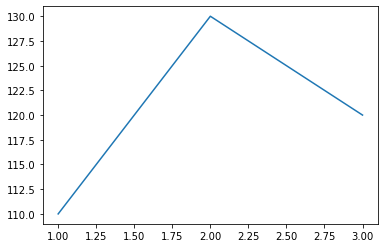

In [100]:
plt.plot([1,2,3], [110,130,120])
# plt.show()

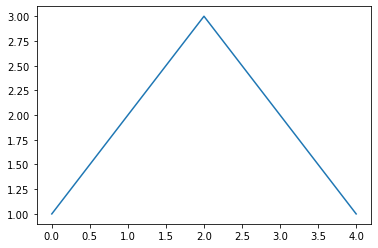

In [101]:
plt.figure()
plt.plot([1,2,3,2,1])
plt.show()

In [102]:
# x, y 값을 설정
x = np.arange(0,12,0.1)
y = np.sin(x)

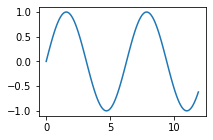

In [103]:
plt.figure(figsize=(3,2))
plt.plot(x,y)

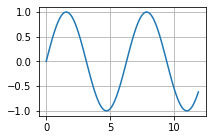

In [104]:
plt.figure(figsize=(3,2))
plt.plot(x,y)
plt.grid() # 그리드 적용

Text(0, 0.5, 'y축')

C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_text(s, 0, flags=flags)


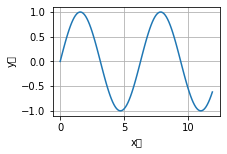

In [105]:
plt.figure(figsize=(3,2))
plt.plot(x,y)
plt.grid() # 그리드 적용
plt.xlabel('x축') # x축 라벨 추가
plt.ylabel('y축') # y축 라벨 추가

Text(0.5, 1.0, '타이틀')

C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53952 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\matplotlib\backends\back

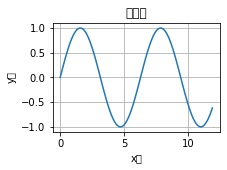

In [106]:
# x, y 값을 설정
x = np.arange(0,12,0.1)
y = np.sin(x)
plt.figure(figsize=(3,2))
plt.plot(x,y)
plt.grid() # 그리드 적용
plt.xlabel('x축') # x축 라벨 추가
plt.ylabel('y축') # y축 라벨 추가
plt.title('타이틀')

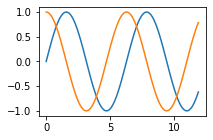

In [107]:
plt.figure(figsize=(3,2))
plt.plot(x,y)
plt.plot(x,np.cos(x))

In [108]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9])

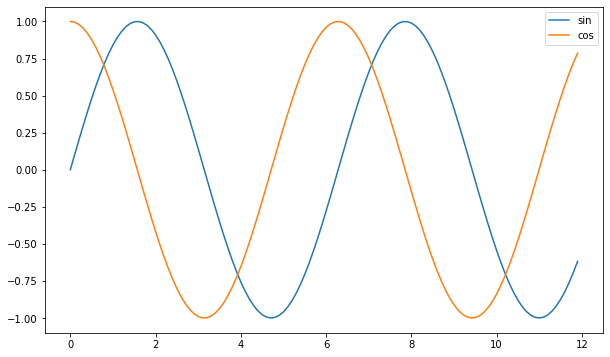

In [109]:
plt.figure(figsize=(10,6))
plt.plot(x,np.sin(x), label='sin')
plt.plot(x,np.cos(x), label='cos')
plt.legend()

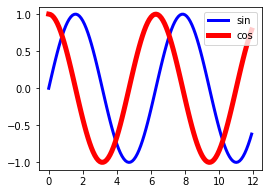

In [110]:
plt.figure(figsize=(4,3))
plt.plot(x,np.sin(x), 'b', label='sin', lw=3) # lw = line width : 선크기
plt.plot(x,np.cos(x), 'r', label='cos', lw=5) # 'r' : red <= color
plt.legend()

(-1.5, 1.5)

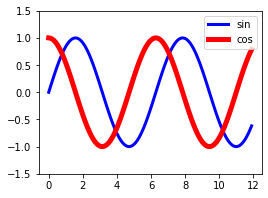

In [111]:
plt.figure(figsize=(4,3))
plt.plot(x,np.sin(x), 'b', label='sin', lw=3) # lw = line width : 선크기
plt.plot(x,np.cos(x), 'r', label='cos', lw=5) # 'r' : red <= color
plt.legend()
plt.ylim(-1.5,1.5)

(0.0, 4.0)

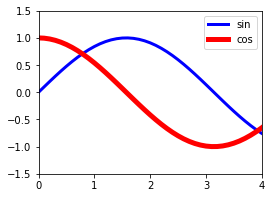

In [112]:
plt.figure(figsize=(4,3))
plt.plot(x,np.sin(x), 'b', label='sin', lw=3) # lw = line width : 선크기
plt.plot(x,np.cos(x), 'r', label='cos', lw=5) # 'r' : red <= color
plt.legend()
plt.ylim(-1.5,1.5)
plt.xlim(0,4)

#### 차트에 스타일 적용

In [113]:
t = np.arange(0,5,0.5)
t

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

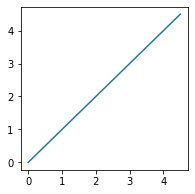

In [114]:
plt.figure(figsize=(3,3))
plt.plot(t,t)

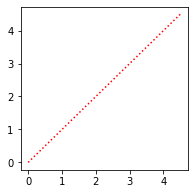

In [115]:
plt.figure(figsize=(3,3))
plt.plot(t,t, 'r:') # style => 'r--' : red = color, -- = 점선 
# 'r-' : 실선, 'r--' : 대쉬, 'r-.', 'r:' : 점선

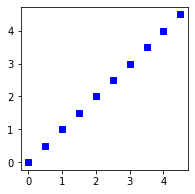

In [116]:
plt.figure(figsize=(3,3))
plt.plot(t,t, 'bs') # style => 'bs' : b(blue) = color, s= 사각형

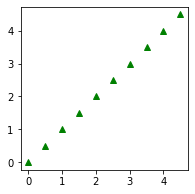

In [117]:
plt.figure(figsize=(3,3))
plt.plot(t,t, 'g^') # style => 'g^' : g(green) = color, ^= ^

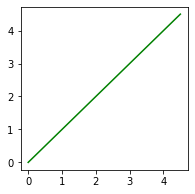

In [118]:
plt.figure(figsize=(3,3))
# plt.plot(t,t, 'g^') # style => 'g^' : g(green) = color, ^= ^
plt.plot(t,t, color='green') # color='green' : 선색

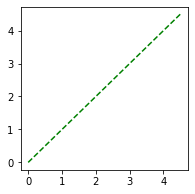

In [119]:
plt.figure(figsize=(3,3))
# plt.plot(t,t, 'g^') # style => 'g^' : g(green) = color, ^= ^
plt.plot(t,t, color='green', linestyle='dashed') # color='green' : 선색, linestyle='dashed'

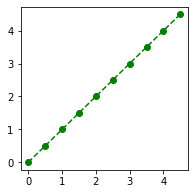

In [120]:
plt.figure(figsize=(3,3))
# plt.plot(t,t, 'g^') # style => 'g^' : g(green) = color, ^= ^
# color='green' : 선색, linestyle='dashed'
# marker='o' 추가
plt.plot(t,t, color='green', linestyle='dashed', marker='o')

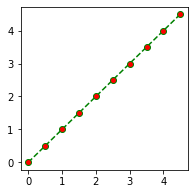

In [121]:
plt.figure(figsize=(3,3))
# plt.plot(t,t, 'g^') # style => 'g^' : g(green) = color, ^= ^
# color='green' : 선색, linestyle='dashed'
# marker='o' 추가
# markerfacecolor='blue' : 마커의 면 색상 지정
plt.plot(t,t
         , color='green'
         , linestyle='dashed'
         , marker='o'
         , markerfacecolor='red'
)

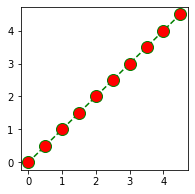

In [122]:
plt.figure(figsize=(3,3))
# plt.plot(t,t, 'g^') # style => 'g^' : g(green) = color, ^= ^
# color='green' : 선색, linestyle='dashed'
# marker='o' 추가
# markerfacecolor='blue' : 마커의 면 색상 지정
# markersize=12 : 마터의 크기 지정
plt.plot(t,t
         , color='green'
         , linestyle='dashed'
         , marker='o'
         , markerfacecolor='red'
         , markersize=12
)

In [124]:
# scatter(산점도)
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

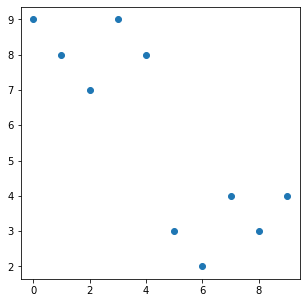

In [127]:
plt.figure(figsize=(5,5))
plt.scatter(t,y)
plt.show()

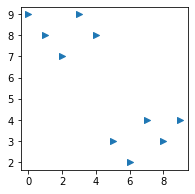

In [129]:
plt.figure(figsize=(3,3))
plt.scatter(t,y, marker='>')
plt.show()

In [130]:
t

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

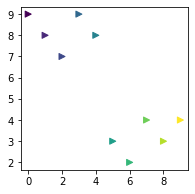

In [131]:
colormap = t
plt.figure(figsize=(3,3))
plt.scatter(t,y, c=colormap, marker='>')
plt.show()

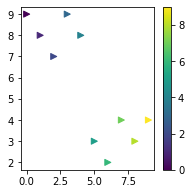

In [134]:
colormap = t
plt.figure(figsize=(3,3))
plt.scatter(t,y, c=colormap, marker='>')
plt.colorbar()
plt.show()

In [135]:
# 범례처리
# np.random.normal() : 정해진 값으로 만들어진 정규분포를 따르는 값을 생성
# 정해진 값 : 평균과 분산
# 함수의 결과는 임의값 -> ndarray 반환된다
# normal() : ndarray 생성
# np.random.normal(loc=평균, scale=분산, size=개수)
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

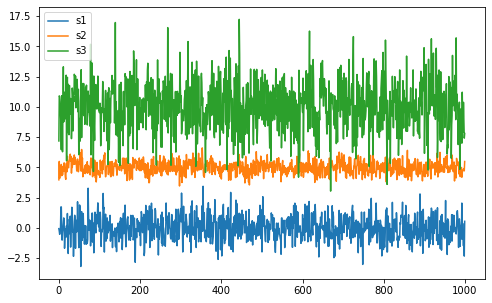

In [137]:
plt.figure(figsize=(8,5))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

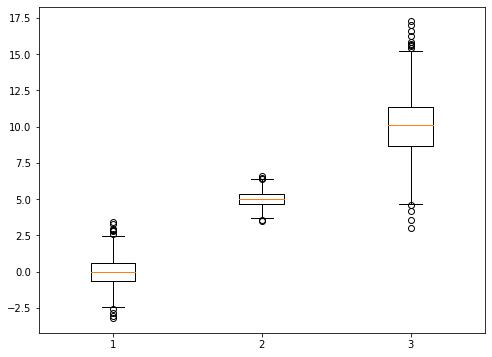

In [138]:
# box plot
plt.figure(figsize=(8,6))
plt.boxplot((s1,s2,s3))
plt.show()

### CCTV와 인구현황 그래프 분석

#### 목표 : CCTV개수와 인구수 비례해서 과한 구와 과소 구를 시각화

In [142]:
# 한글 문제 해결 코드
import platform as pf
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus']=False

if pf.system() == 'Darwin':
    rc('font', family='AppleGothic') # Mac 한글 가능
elif pf.system() == 'Windows':
    path='c:/Windows/Fonts/malgun.ttf' # 윈도우 한글글꼴 경로 설정
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('지원하지 않는 운영체제입니다.')

Text(0.5, 1.0, '타이틀')

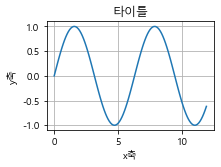

In [143]:
# x, y 값을 설정
x = np.arange(0,12,0.1)
y = np.sin(x)
plt.figure(figsize=(3,2))
plt.plot(x,y)
plt.grid() # 그리드 적용
plt.xlabel('x축') # x축 라벨 추가
plt.ylabel('y축') # y축 라벨 추가
plt.title('타이틀')

In [145]:
data_result.head(1)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.86766,11.072217


In [146]:
type(data_result)

pandas.core.frame.DataFrame

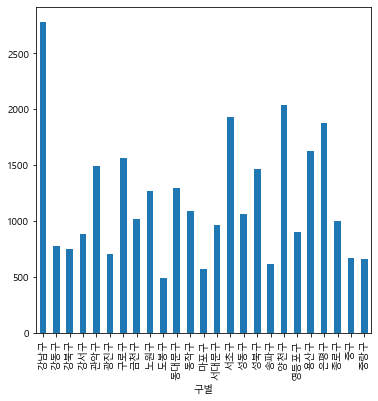

In [148]:
# CCTV 현황 시각화
plt.figure()
data_result['소계'].plot(kind='bar'
                       , figsize=(6,6))

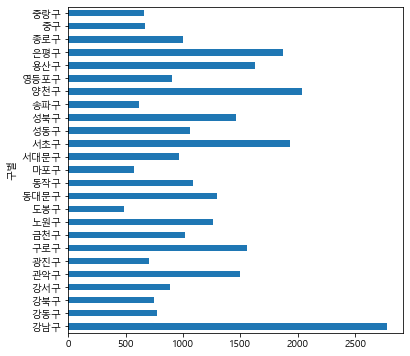

In [150]:
# CCTV 현황 시각화
plt.figure()
data_result['소계'].plot(kind='barh'
                       , figsize=(6,6))
plt.show()

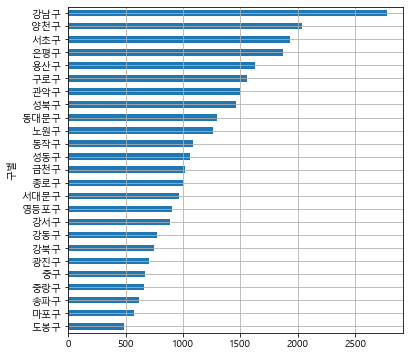

In [151]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(6,6))

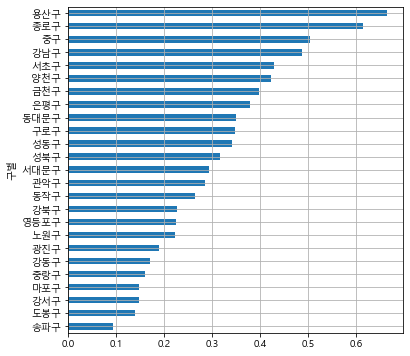

In [152]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(6,6))

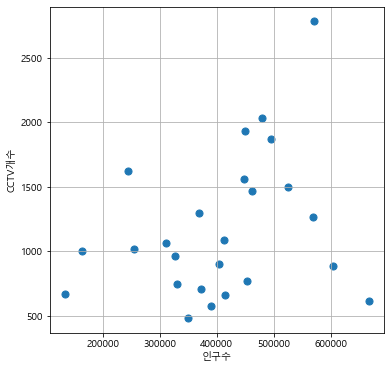

In [153]:
plt.figure(figsize=(6,6))
plt.scatter(
      data_result['인구수'] # X 축
    , data_result['소계'] # Y축
    , s=50
)
plt.xlabel('인구수')
plt.ylabel('CCTV개수')
plt.grid()
plt.show()

In [155]:
# numpy.ployfit() : 지정한 차수의 다항식 계수 찾는다
# 1차식 : y = a * X + b => 계수 : 오차가 최소가 되는  a, b 
# numpy.ploy1d() : 식을 만드는 함수 
# y(소계) = a * X(인구수) + b
# fp1 = np.ployfit(X값, Y값, 차수)
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [156]:
# 위의 계수를 가지고 식 생성
f1 = np.poly1d(fp1)
f1
# f1 식에 인구수를 대입해서 적정한 CCTV개수를 산출할 수 있다

poly1d([1.30916415e-03, 6.45066497e+02])

In [160]:
print(data_result['인구수'].min())
print(data_result['인구수'].max())

133240.0
667483.0


In [167]:
np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [168]:
# fx = np.linspace(시작값, 끝값, 몇개나눌지 구간 지정)
fx = np.linspace(100000,700000,100)

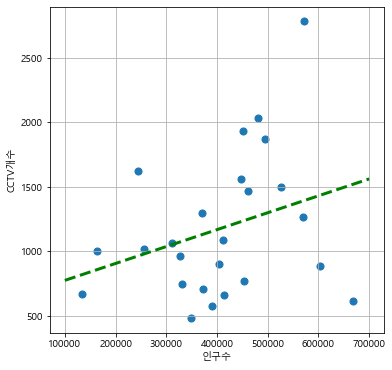

In [172]:
plt.figure(figsize=(6,6))
plt.scatter(
      data_result['인구수']
    , data_result['소계']
    , s = 50 # 점의 크기
)
plt.plot(
      fx     # X 축값 (인구수)
    , f1(fx) # Y 축값 (CCTV 개수-> 보편적 개수)
    , ls='dashed' # ls = line style
    , lw=3        # lw = line width
    , color='g' 
)
plt.xlabel('인구수')
plt.ylabel('CCTV개수')
plt.grid()
plt.show()

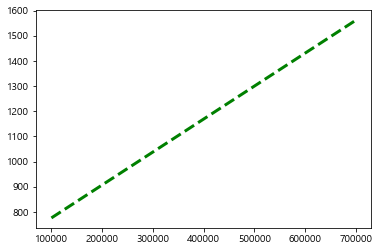

In [170]:
plt.plot(
      fx     # X 축값 (인구수)
    , f1(fx) # Y 축값 (CCTV 개수-> 보편적 개수)
    , ls='dashed' # ls = line style
    , lw=3        # lw = line width
    , color='g' 
)

In [173]:
# 상위 5개, 하위 5개 구를 찾겠다.
# 오차를 찾겠다....
# 절대값 : abs()-> 내장함수-> 반복처리 필요, np.abs()
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
data_result.head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026


In [175]:
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head(5) # 상위 5개 

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


In [176]:
df_sort.tail(5) # 하위 5개 

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,0.222170,125.483618
서대문구,962,48.578199,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797,0.294043,111.376568
동작구,1091,139.338235,412520.0,400456.0,12064.0,56013.0,2.924464,13.578251,0.264472,94.122892
금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.397911,35.989293
성동구,1062,81.780822,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689,0.341211,9.464016


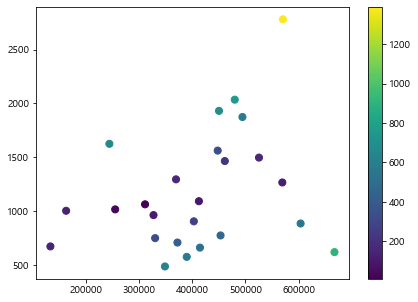

In [179]:
colormap = data_result['오차']
plt.figure(figsize=(7,5))
plt.scatter(  
      data_result['인구수']
    , data_result['소계']
    , c=colormap
    , s = 50
)
plt.colorbar()

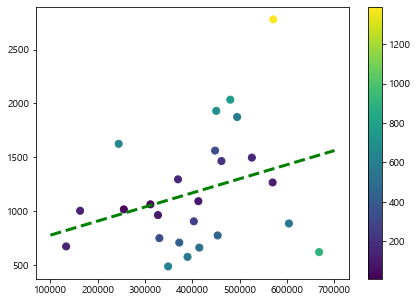

In [180]:
colormap = data_result['오차']
plt.figure(figsize=(7,5))
plt.scatter(  
      data_result['인구수']
    , data_result['소계']
    , c=colormap
    , s = 50
)
plt.plot(
      fx      # X축값 : 10만~70만 100개 구간값
    , f1(fx)  # Y축값 : 10만~70만 100개 구간값을 식(함수)
    , ls='dashed', lw=3, color='g'
)
plt.colorbar()

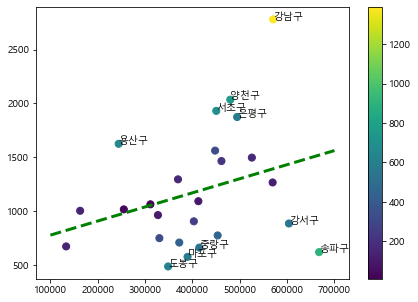

In [183]:
colormap = data_result['오차']
plt.figure(figsize=(7,5))
plt.scatter(  
      data_result['인구수']
    , data_result['소계']
    , c=colormap
    , s = 50
)
plt.plot(
      fx      # X축값 : 10만~70만 100개 구간값
    , f1(fx)  # Y축값 : 10만~70만 100개 구간값을 식(함수)
    , ls='dashed', lw=3, color='g'
)
# 상위 10개 구의 구이름 문자로 출력 
# 차트에 문자 출력 함수 : plt.text()
# plt.text(X축 위치값, Y축 위치값, 출력할 문자열, 글자크기)
for n in range(10):# 10번 반복
    plt.text(
          df_sort['인구수'][n] # X축 위치값
        , df_sort['소계'][n] # Y축 위치값
        , df_sort.index[n]
        , fontsize=10
    )

plt.colorbar()

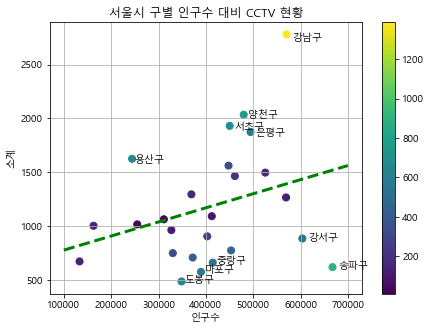

In [187]:
colormap = data_result['오차']
plt.figure(figsize=(7,5))
plt.scatter(  
      data_result['인구수']
    , data_result['소계']
    , c=colormap
    , s = 50
)
plt.plot(
      fx      # X축값 : 10만~70만 100개 구간값
    , f1(fx)  # Y축값 : 10만~70만 100개 구간값을 식(함수)
    , ls='dashed', lw=3, color='g'
)
# 상위 10개 구의 구이름 문자로 출력 
# 차트에 문자 출력 함수 : plt.text()
# plt.text(X축 위치값, Y축 위치값, 출력할 문자열, 글자크기)
for n in range(10):# 10번 반복
    plt.text(
          df_sort['인구수'][n] * 1.02  # X축 위치값
        , df_sort['소계'][n] * 0.98    # Y축 위치값
        , df_sort.index[n]
        , fontsize=10
    )

plt.grid()
plt.xlabel('인구수')
plt.ylabel('소계')
plt.title('서울시 구별 인구수 대비 CCTV 현황')
plt.colorbar()
plt.show()

In [181]:
df_sort.head(1)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.86766,11.072217,0.487292,1388.055355
